## **1. Exploraci√≥n Inicial:**

   - Realiza una exploraci√≥n inicial de los datos para identificar posibles problemas, como valores nulos, at√≠picos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener informaci√≥n sobre la estructura de los datos, la presencia de valores nulos y estad√≠sticas b√°sicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma m√°s eficiente. 

In [2]:
# Inicio, importar librerias necesarias:
# pandas: tratamiento de DataFrames
# numpy: control num√©rido
# matplotlib: visualizaciones
# seaborn: visualizaciones avanzadas


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Imputaci√≥n de nulos usando m√©todos avanzados estad√≠sticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


In [3]:
# Lectura de ficheros csv
#Se guardan en dos dataframes diferentes
df_activity = pd.read_csv('Customer Flight Activity.csv', on_bad_lines='skip')
df_history = pd.read_csv('Customer Loyalty History.csv', on_bad_lines='skip')


In [ ]:
'''Funciones '
'check: visualizaci√≥n'
'null_check: Comprobar  nulos'
'tratar_null: Tratamiento de nulos'
'tratar_duplis:  tratar los duplicados
Esta casilla vamos a guardar las funciones que posteriormente pasaremos a un fichero .py y llamaermos desde main

'''

#Funci√≥n para comprobar forma, columnas, tiipos de datos, nulos EDA
#Nos ayudar√° a entender los datos
#La usaremos en el futuro pasando un dataframe

def check(df):
        print(f"La forma:")
        print(f"{df.shape}\n")
        print(f"\n-----------------------------\n")
        print(f"Las columnas:")
        print(f"{df.columns}\n")
        print(f"\n-----------------------------\n")
        print(f"Los tipos de datos:")
        print(f"{df.dtypes}\n")
        print(f"\n-----------------------------\n")
        print(f"Los nulos:")
        print(f"{df.isnull().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los duplicados:")
        print(f"{df.duplicated().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los principales estad√≠sticos:")
        print(f"{df.describe().T}\n")

        print(f"Las modas de las columnas categ√≥ricas:\n")
        columnas_cat = df.select_dtypes(include = 'object')
        for columna in columnas_cat:
            if df[columna].isnull().any():
                print(f"Revisando {columna}")
                print(df[columna].value_counts())  #mode()[0]
                print("") 
        print(f"\n-----------------------------\n")
        return


def null_check(df):
    
        print(" COLUMNAS CATEG√ìRICAS")
        col_obj = df.select_dtypes(include='object').columns
        #Lista para guardar columnas

        found_obj = False  #Manera de comprobar que vamos a encontra nulos las columnas categoricas
        #Recorremos el bucle columna por columna
        for col in col_obj:
            
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                #Si el porcentaje es de X se podria comparar aqui y tratar


                found_obj = True #Check de que ha encontrado nulos

        if not found_obj:
            print(" No hay nulos en columnas categ√≥ricas")


        #Ahora comprobaci√≥n de columas de tipo num√©rico
        print(" COLUMNAS NUM√âRICAS")
        col_num = df.select_dtypes(include='number').columns
        
        found_num = False
        for col in col_num:
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                found_num = True
        if not found_num:
            print(" No hay nulos en columnas num√©ricas")


''' 
Esta funci√≥n va a comprobar los nulos, porsteriormente, tras comprobar el % de nulos toma la decisi√≥n de como tratar
En variables categoricas
% pocos---> La moda
% Muchos---> otra categoria
En columnas de tipo numerico

 '''
 

def tratar_null(df):
    
    col_obj = df.select_dtypes(include='object').columns        
    col_num = df.select_dtypes(include='number').columns
    #Lista para guardar columnas, trataremos una a una las nulas, dependiendo el tipo de dato y % de datos
    #Recorremos el bucle columna por columna
    for col in col_obj:
        por = df[col].isnull().mean() * 100
        if por == 0:
            print(f"No hay nulos en: {col} ")
        else:    
            if por < 20:
                # Pocos nulos: imputar con la moda (valor m√°s frecuente)
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Moda")
                df[col] = df[col].fillna(df[col].mode()[0])

            elif 20 <= por < 80:
                # Bastantes nulos: imputar con valor gen√©rico
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> 'Unknown'")
                df[col] = df[col].fillna('Unknown')

            else:
                # Demasiados nulos: se puede optar por eliminar o marcar aparte
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o analizarla aparte.")
                df.drop(df[col], axis=1, inplace=True)
                #df[col] = df.drop(df[col], axis=1, inplace=True)
                

            #Si el porcentaje es de X se podria comparar aqui y tratar
            #Ahora comprobaci√≥n de columas de tipo num√©rico
    for col in col_num:
        por = df[col].isnull().mean() * 100
        if por == 0:
                print(f"No hay nulos en: {col} ")
        
        else:    
            if por < 20:
                # Pocos nulos: imputar con la media
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Media")
                imputer = SimpleImputer(strategy='mean')
                df[col] = imputer.fit_transform(df[[col]])

            elif 21 <= por < 70:
                # Porcentaje medio-alto de nulos: imputar con KNN
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> KNNImputer")
                imputer_knn = KNNImputer(n_neighbors=5)
                df[col] = imputer_knn.fit_transform(df[[col]])

                # Cambio

            elif por > 71:
            # Demasiados nulos: imputar con un valor neutro o eliminar
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o imputar manualmente.")
                #df=df.drop(df[col], axis=1)
        #Ya tratadito devolvemos el df
    
    return df
           

def trata_duplis(df):
    df = df.drop_duplicates()    
    return df   
        




In [5]:
check(df_history)  # Datos del programa seg√∫n usuario
check(df_activity)  #Perfil de la gente asociada al programa de puntos


La forma:
(16737, 16)


-----------------------------

Las columnas:
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


-----------------------------

Los tipos de datos:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object


-----------------------------

Los nulos:
Loyalty Number            0
Country               

Despu√©s de una visualizaci√≥n r√°pida, lo primero:
- Pasar a minuscula las columnas
- Reemplazar el espacio por _

In [6]:
#Para evitar errores, paso el nombre de las columnas a min√∫scula
df_activity.columns=df_activity.columns.str.lower()
df_activity.columns = df_activity.columns.str.replace(' ','_',)


In [7]:
#Para evitar errores, paso el nombre de las columnas a min√∫scula
df_history.columns = df_history.columns.str.lower()
df_history.columns = df_history.columns.str.replace(' ','_')


In [8]:
df_activity.sample(3)
#Visualizaci√≥n rapida de lo que contiene el dataframe


loyalty_number  year  month  flights_booked  flights_with_companions  \
180019          685408  2017     11               5                        5   
231829          743510  2018      2               0                        0   
112489          689353  2017      7              20                        6   

        total_flights  distance  points_accumulated  points_redeemed  \
180019             10      3450               345.0                0   
231829              0         0                 0.0                0   
112489             26      5668               566.0                0   

        dollar_cost_points_redeemed  
180019                            0  
231829                            0  
112489                            0

In [9]:
df_history.sample(3)
#Visualizaci√≥n rapida de lo que contiene el dataframe

loyalty_number country       province         city postal_code  gender  \
14988          606563  Canada  New Brunswick  Fredericton     E3B 2H2    Male   
11129          198900  Canada   Saskatchewan       Regina     S6J 3G0  Female   
7976           355039  Canada         Quebec     Montreal     H3T 8L4  Female   

      education   salary marital_status loyalty_card      clv enrollment_type  \
14988  Bachelor  67664.0        Married         Star  8237.25        Standard   
11129  Bachelor  63991.0        Married         Star  2574.20        Standard   
7976   Bachelor  69098.0        Married         Nova  8092.88        Standard   

       enrollment_year  enrollment_month  cancellation_year  \
14988             2013                 4             2018.0   
11129             2016                 1                NaN   
7976              2017                 7                NaN   

       cancellation_month  
14988                 5.0  
11129                 NaN  
7976                  NaN

In [10]:
df_sky = pd.merge(df_history, df_activity, on='loyalty_number', how='left')
# unimos los dos dataframes en uno solo, usando la columna loyalty_number que es com√∫n a ambos
# y hacemos un left join para no perder datos del df_history que es el principal, y estar√° en la izquierda
# el left join es porque queremos conservar todos los registros del df_history, aunque no tengan coincidencias en df_activity

In [11]:
df_sky.sample(5)
# Visualizaci√≥n r√°pida del nuevo dataframe unido

loyalty_number country          province       city postal_code  \
270176          574771  Canada            Quebec       Hull     J8Y 3Z5   
345801          724071  Canada            Quebec       Hull     J8Y 3Z5   
92044           675956  Canada           Ontario    Toronto     P1W 1K4   
75427           931657  Canada  British Columbia  Vancouver     V5R 1W3   
272491          455606  Canada  British Columbia  Vancouver     V6E 3D9   

        gender education   salary marital_status loyalty_card  ...  \
270176  Female  Bachelor  53493.0       Divorced         Star  ...   
345801    Male  Bachelor  27569.0         Single         Nova  ...   
92044     Male   College      NaN         Single       Aurora  ...   
75427     Male  Bachelor  70495.0        Married       Aurora  ...   
272491  Female  Bachelor  50918.0        Married         Star  ...   

        cancellation_month  year  month  flights_booked  \
270176                 NaN  2017      9               5   
345801                 NaN  2017      9               0   
92044                  NaN  2017      5               3   
75427                  NaN  2018      8               0   
272491                 NaN  2018      8               8   

        flights_with_companions  total_flights  distance  points_accumulated  \
270176                        0              5      2175               217.0   
345801                        0              0         0                 0.0   
92044                         0              3      1809               180.0   
75427                         0              0         0                 0.0   
272491                        7             15      4290               429.0   

        points_redeemed  dollar_cost_points_redeemed  
270176                0                            0  
345801                0                            0  
92044                 0                            0  
75427                 0                            0  
272491                0                            0  

[5 rows x 25 columns]

In [12]:
check(df_sky)
#EDA del nuevo dataframe unido

La forma:
(405624, 25)


-----------------------------

Las columnas:
Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')


-----------------------------

Los tipos de datos:
loyalty_number                   int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv          

In [13]:
df_sky.describe().T

count           mean            std  \
loyalty_number               405624.0  550037.873084  258935.286969   
salary                       302952.0   79268.825953   34992.133508   
clv                          405624.0    7991.976226    6863.663857   
enrollment_year              405624.0    2015.252529       1.979427   
enrollment_month             405624.0       6.668008       3.399766   
cancellation_year             50064.0    2016.499521       1.384336   
cancellation_month            50064.0       6.966443       3.448300   
year                         405624.0    2017.500000       0.500001   
month                        405624.0       6.500000       3.452057   
flights_booked               405624.0       4.115052       5.225518   
flights_with_companions      405624.0       1.031805       2.076869   
total_flights                405624.0       5.146858       6.521227   
distance                     405624.0    1208.880059    1433.155320   
points_accumulated           405624.0     123.692721     146.599831   
points_redeemed              405624.0      30.696872     125.486049   
dollar_cost_points_redeemed  405624.0       2.484503      10.150038   

                                   min        25%        50%        75%  \
loyalty_number               100018.00  326961.00  550834.00  772194.00   
salary                       -58486.00   59262.00   73479.00   88612.00   
clv                            1898.01    3985.32    5776.34    8936.82   
enrollment_year                2012.00    2014.00    2015.00    2017.00   
enrollment_month                  1.00       4.00       7.00      10.00   
cancellation_year              2013.00    2016.00    2017.00    2018.00   
cancellation_month                1.00       4.00       7.00      10.00   
year                           2017.00    2017.00    2017.50    2018.00   
month                             1.00       3.75       6.50       9.25   
flights_booked                    0.00       0.00       1.00       8.00   
flights_with_companions           0.00       0.00       0.00       1.00   
total_flights                     0.00       0.00       1.00      10.00   
distance                          0.00       0.00     488.00    2336.00   
points_accumulated                0.00       0.00      50.00     239.00   
points_redeemed                   0.00       0.00       0.00       0.00   
dollar_cost_points_redeemed       0.00       0.00       0.00       0.00   

                                   max  
loyalty_number               999986.00  
salary                       407228.00  
clv                           83325.38  
enrollment_year                2018.00  
enrollment_month                 12.00  
cancellation_year              2018.00  
cancellation_month               12.00  
year                           2018.00  
month                            12.00  
flights_booked                   21.00  
flights_with_companions          11.00  
total_flights                    32.00  
distance                       6293.00  
points_accumulated              676.50  
points_redeemed                 876.00  
dollar_cost_points_redeemed      71.00

## 2. Limpieza
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos est√©n completos.
   - Verifica la consistencia y correcci√≥n de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversi√≥n necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuaci√≥n de los datos para el an√°lisis estad√≠stico.

In [14]:
null_check(df_sky)
#LLama a una funci√≥n que nos dice el estado de los nulos, sacando el % cuando en la columna hay nulos

 COLUMNAS CATEG√ìRICAS
 No hay nulos en columnas categ√≥ricas
 COLUMNAS NUM√âRICAS
 - salary: 25% de nulos
 - cancellation_year: 88% de nulos
 - cancellation_month: 88% de nulos


In [15]:
df_sky = tratar_null(df_sky)
#Funci√≥n que trata los nulos, diferencia entre numerico / categoricos y aplica o m√°s conveniente dependiedo 
#del porcentaje 

No hay nulos en: country 
No hay nulos en: province 
No hay nulos en: city 
No hay nulos en: postal_code 
No hay nulos en: gender 
No hay nulos en: education 
No hay nulos en: marital_status 
No hay nulos en: loyalty_card 
No hay nulos en: enrollment_type 
No hay nulos en: loyalty_number 
Tratando columna: salary (25% nulos) -> Media
No hay nulos en: clv 
No hay nulos en: enrollment_year 
No hay nulos en: enrollment_month 
Columna cancellation_year tiene 88% nulos. Considerar eliminarla o imputar manualmente.
Columna cancellation_month tiene 88% nulos. Considerar eliminarla o imputar manualmente.
No hay nulos en: year 
No hay nulos en: month 
No hay nulos en: flights_booked 
No hay nulos en: flights_with_companions 
No hay nulos en: total_flights 
No hay nulos en: distance 
No hay nulos en: points_accumulated 
No hay nulos en: points_redeemed 
No hay nulos en: dollar_cost_points_redeemed 


In [16]:
#La funcion de tratar nulos nos ha devuelto un nuevo df, y a parte como da fallo en el borrado
#He considerado borrar las dos columnas que me indica

df_sky.drop('cancellation_year', axis=1, inplace=True)
df_sky.drop('cancellation_month', axis=1, inplace=True)

In [17]:
#Comprobacion de los duplicados
#Borra las filas que estan duplicadas

df_sky = trata_duplis(df_sky)


In [18]:
#Vuelvo a comprobar si hay nulos/ duplicados y si esta todo tratado
check(df_sky)

La forma:
(403760, 23)


-----------------------------

Las columnas:
Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')


-----------------------------

Los tipos de datos:
loyalty_number                   int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type         

## Visualizaci√≥n
Usando las herramientas de visualizaci√≥n que has aprendido durante este m√≥dulo, contesta a las siguientes gr√°ficas usando la mejor gr√°fica que consideres:  

1. ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?
2. ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?
4. ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?

In [19]:
df_sky.columns
#Voy a guiarme por las columnas para ir sacando las visualizaciones

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

## ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?

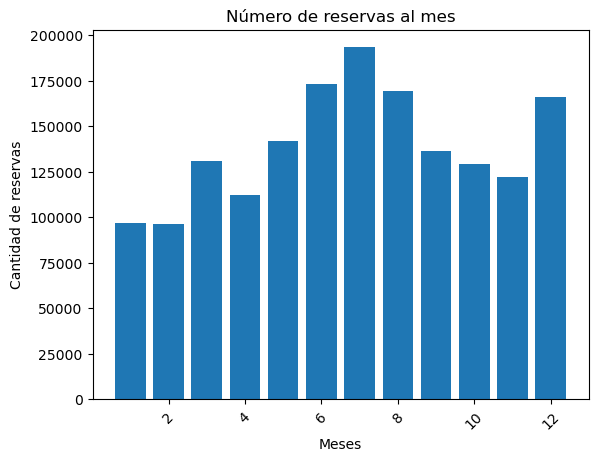

In [20]:
resumen = df_sky.groupby('month')['flights_booked'].sum()
#Cuando usamos una agrupaci√≥n: eje x es agrupaci√≥n.index, height es agrupaci√≥n.values
plt.bar(x=resumen.index, height=resumen.values)
plt.xlabel('Meses')
plt.ylabel('Cantidad de reservas')
plt.title('N√∫mero de reservas al mes')
plt.xticks(rotation=45);


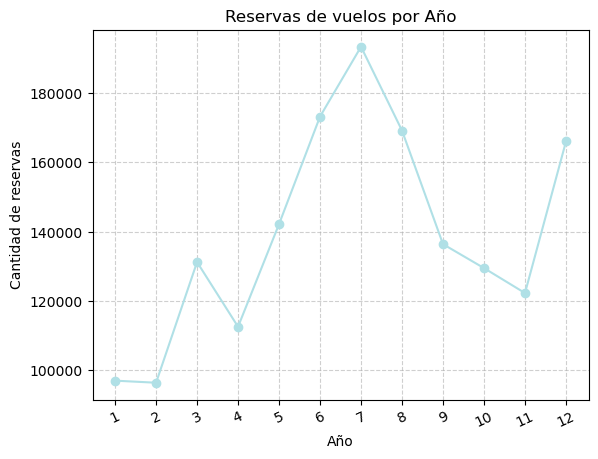

In [21]:
plt.plot(resumen.index,resumen.values, color='powderblue', marker="o")
plt.title('Reservas de vuelos por A√±o')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de reservas')
plt.xticks(resumen.index, rotation=25)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Las reservas de vuelos se disparan en Julio, seguido de junio y agosto. tambi√©n se ve un peque√±o pico en diciembre. Esta es la prueba que las reservas se disparan en los periodos vacacionales, tanto verano como Navidad.

## 2. ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?


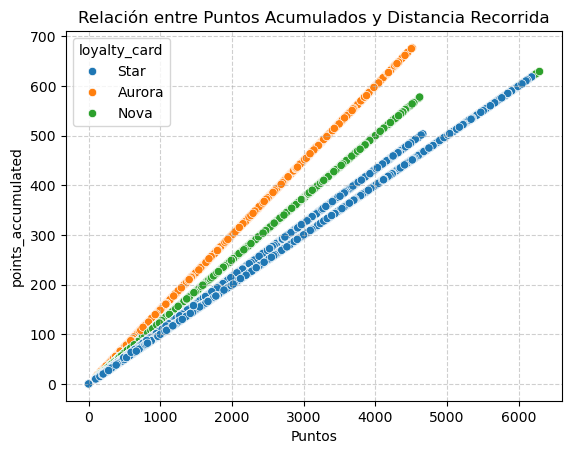

In [40]:
# Visualizaci√≥n de dos variables numericas (scatter pot)
sns.scatterplot(x=df_sky['distance'], y=df_sky['points_accumulated'], hue=df_sky['loyalty_card'])
plt.xlabel('Distancia')
plt.xlabel('Puntos')
plt.title('Relaci√≥n entre Puntos Acumulados y Distancia Recorrida')  
plt.grid(True, linestyle='--', alpha=0.6)  


Se ve una relaci√≥n s√≥lida, mayor distancia, m√°s puntos.
Los usuarios acumulan m√°s puntos a mayor distancia de sus vuelos.

## 3. ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?

Text(0.5, 1.0, 'Distribuci√≥n de Clientes por Provincia')

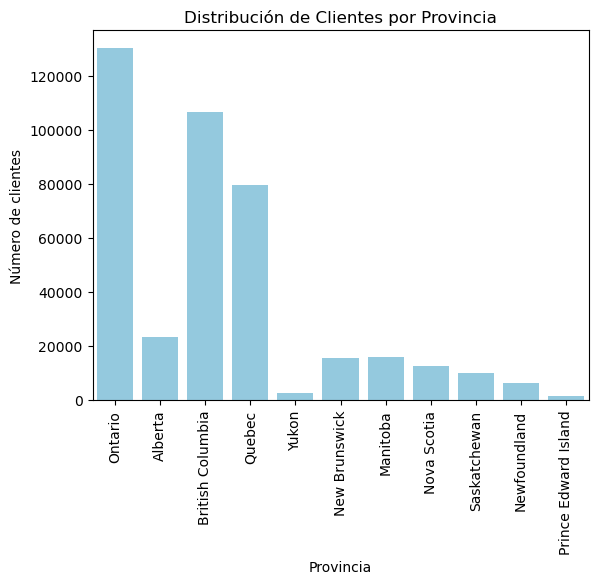

In [23]:
#count plot 
sns.countplot(data=df_sky, x='province', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('N√∫mero de clientes')
plt.title('Distribuci√≥n de Clientes por Provincia')

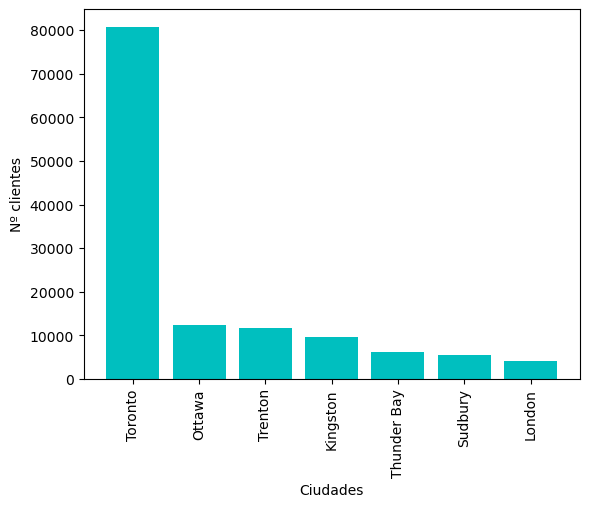

In [24]:
#Ahora quiero ver de esa provincia, cuales son las ciudades con m√°s clientes
fil = df_sky[df_sky['province'] == 'Ontario']
cius = fil['city'].value_counts()
plt.bar(x=cius.index, height=cius.values, color='c')
plt.xticks(rotation=90)
plt.xlabel("Ciudades")
plt.ylabel("N¬∫ clientes")
plt.show()


Los clientes pertencen a una BBDD  de Canad√°, principalmente son mayoria en la provincia de Ontario, en la cual se encuentra Toronto. 

Se ve claramente que en Ontario se centran laos usuarios que m√°s reservan, seguido de British Columbia.
Despu√©s, se ha hecho un filtro por provincia para ver cual ser√≠a la ciudad de Ontario que m√°s reserva.

### 4  ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

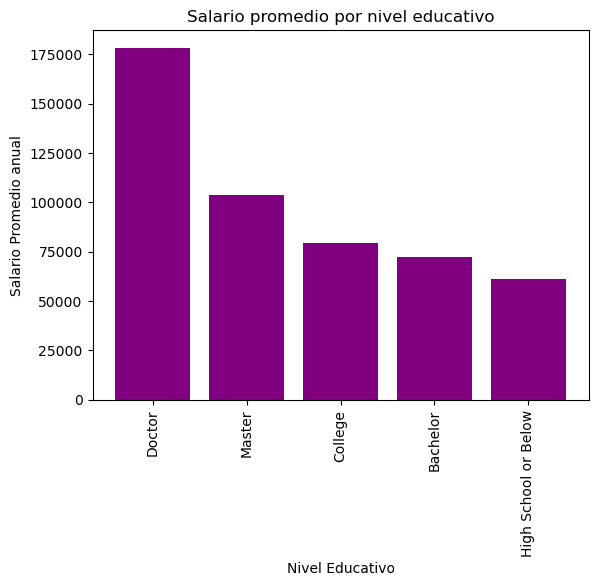

In [25]:
salar = df_sky.groupby('education')['salary'].mean().sort_values(ascending=False)
#salar.plot(kind='bar', color='pink', edgecolor='black')
plt.bar(x=salar.index, height=salar.values, color= 'purple')
plt.xticks(rotation=90) # Gira los nombres para que se vean bien
plt.title("Salario promedio por nivel educativo")
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio anual')
plt.show();





El salario medio mayor ser√° el de los Doctores, mayor responsabilidad, mayores ingresos.
Tiene relaci√≥n seg√∫n sus estudios, a mayor titulaci√≥n mayores ingresos.

## 5. ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad?

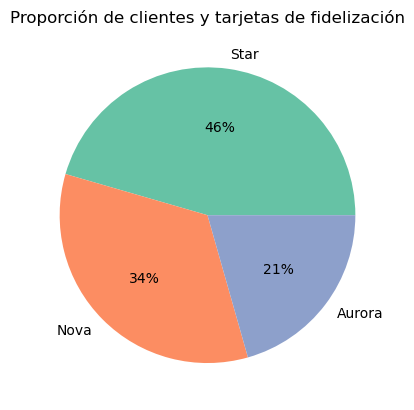

In [26]:
tarjetas = df_sky['loyalty_card'].value_counts()
categoria = tarjetas.index
plt.pie(tarjetas, labels=categoria, autopct='%1.0f%%', colors=sns.color_palette('Set2'))
plt.title('Proporci√≥n de clientes y tarjetas de fidelizaci√≥n')
plt.show();


- Star son la mayor√≠a, con un 46%
- Nova seguidos con un 34%
- Aurora √∫ltimos con un 21%

### ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?

In [27]:
# gender marital_status
# 2 VARIABLES CATEG√ìRICAS--> crosstab
tabla1 = pd.crosstab(df_sky['gender'], df_sky['marital_status'])
tabla1

marital_status  Divorced  Married  Single
gender                                   
Female             30634   117363   54760
Male               30128   117482   53393

Podemos apreciar que hay un n√∫mero muy similar entre los distintos estados civiles.
Es decir, tenemos muy balanceados estos campos, m√°s abajo se aprecia visualmente.

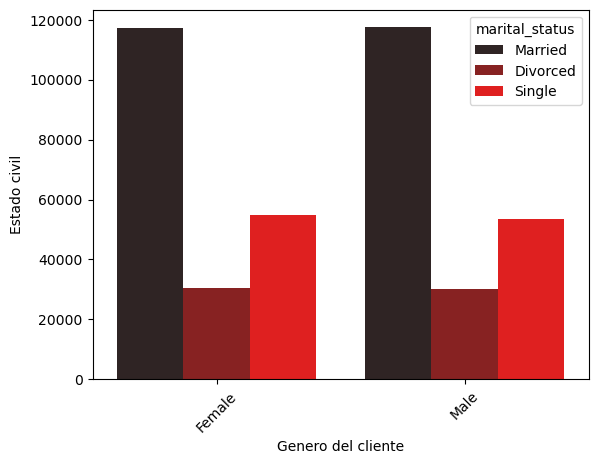

In [28]:
sns.countplot(x='gender', data=df_sky, color = 'r', hue = 'marital_status')
plt.xticks(rotation=45)
plt.xlabel("Genero del cliente")
plt.ylabel("Estado civil")
plt.show();


No se aprecian diferenicas significativas en el estado civil por genero.
Si destaca que hombres y mujeres casad@s son los que m√°s viajes reservan.

## BONUS Fase 3: Evaluaci√≥n de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el n√∫mero de vuelos reservados seg√∫n el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una poblaci√≥n. Para ello, los pasos que deber√°s seguir son: 


In [29]:
# Filtra el conjunto de datos para incluir √∫nicamente la columna num√©rica relevante: 'flights_booked'
df_filtrado = df_sky[['education', 'flights_booked']]


In [30]:
#Agrupa los datos por nivel educativo y calcula estad√≠sticas descriptivas b√°sicas 
# (como el promedio, mediana, la desviaci√≥n est√°ndar)
#  del n√∫mero de vuelos reservados para cada grupo. Aqu√≠, utilizamos estad√≠stica descriptiva normal.
df_sky.groupby('education')['flights_booked'].describe().T.round(2)

education   Bachelor    College    Doctor  High School or Below    Master
count      252567.00  102260.00  17731.00              18915.00  12287.00
mean            4.11       4.17      4.18                  4.18      4.20
std             5.22       5.25      5.26                  5.24      5.21
min             0.00       0.00      0.00                  0.00      0.00
25%             0.00       0.00      0.00                  0.00      0.00
50%             1.00       1.00      1.00                  1.00      1.00
75%             8.00       8.00      8.00                  8.00      8.00
max            21.00      21.00     21.00                 21.00     21.00

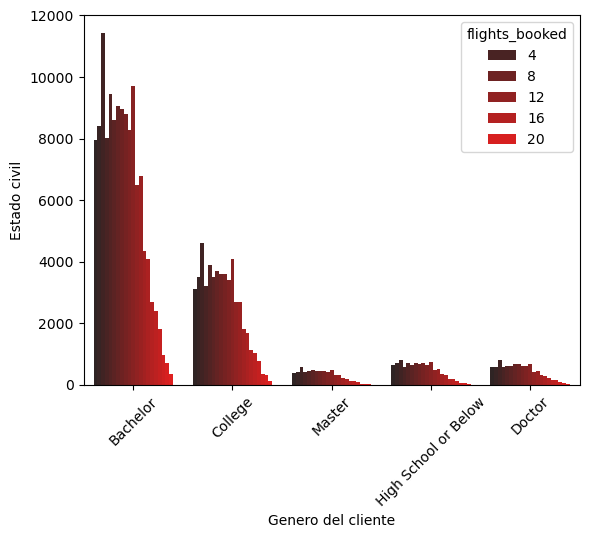

In [31]:
filt = df_sky[df_sky['flights_booked'] > 0]
sns.countplot(x='education', data=filt, color = 'r', hue = 'flights_booked')
plt.xticks(rotation=45)
plt.xlabel("Genero del cliente")
plt.ylabel("Estado civil")
plt.show();


## **Prueba Estad√≠stica:**
Realiza una prueba de hip√≥tesis para determinar si existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos. Aqu√≠ utilizamos estad√≠stica inferencial.

In [32]:
#1 Media de las reservas
mediaf = df_sky['flights_booked'].mean().round(2)
mediaf

np.float64(4.13)

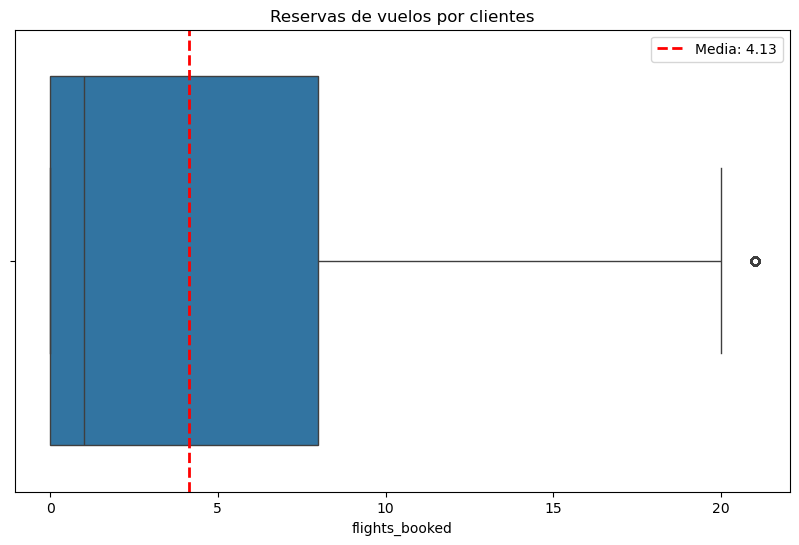

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sky['flights_booked'])
plt.axvline(mediaf, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mediaf}')
# A√±adir leyenda y t√≠tulo
plt.legend()
plt.title('Reservas de vuelos por clientes')
# Mostrar el gr√°fico
plt.show()

In [34]:
# 2. Desviaci√≥n est√°ndar del n√∫mero de vuelos reservados.
std_f = df_sky['flights_booked'].std()
print(std_f)

5.230063724478074


In [35]:
#3 Seleccionar el nivel de confianza
#Tendremos que aplicar una formula para calcular el intervalo de confianza
#Para ello necesitamos el tama√±o de la muestra

n = len(df_sky['flights_booked'])

confidence_interval = stats.t.interval(
    confidence=0.95,    # Nivel de confianza
    df=n-1,             # Grados de libertad. Es para corregir el sesgo. 
    loc=mediaf,  # Media de la muestra
    scale=std_f/ np.sqrt(n))  # Calculamos la variabilidad de la media. Siempre lo ponemos as√≠


confidence_interval

(np.float64(4.113867758026849), np.float64(4.146132241973151))

In [36]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versi√≥n de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aqu√≠ vamos a decidir hacer komogorov porque es m√°s potente y shapiro solo en muestras peque√±as
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estad√≠stico": t_stat,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0. Es decir, s√≠ hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera m√°s clara
    print("\nüìä **Resultados de la Prueba de Hip√≥tesis** üìä")
    print(f"‚úÖ Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"‚úÖ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"‚úÖ Test aplicado: {test_usado}")
    print(f"üìâ Estad√≠stico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"üîç Conclusi√≥n: {resultado['Conclusi√≥n']}\n")

In [37]:
df_sky['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [38]:
bachelor = df_sky[df_sky['education'] == 'Bachelor']["flights_booked"]
college = df_sky[df_sky['education'] == 'College']["flights_booked"]
master = df_sky[df_sky['education'] == 'Master']["flights_booked"]
hs = df_sky[df_sky['education'] == 'High School or Below']["flights_booked"]
dr = df_sky[df_sky['education'] == 'Doctor']["flights_booked"]

In [45]:
prueba_hipotesis(bachelor, master)


üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
‚úÖ Test de Varianza: Iguales (p = 0.1183)
‚úÖ Test aplicado: Mann-Whitney U
üìâ Estad√≠stico: 1532540228.0000, p-valor: 0.0141
üîç Conclusi√≥n: Rechazamos H0. Es decir, s√≠ hay diferencias significativas)

